<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка" data-toc-modified-id="Загрузка-и-предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка</a></span></li><li><span><a href="#Подготовка-датасетов" data-toc-modified-id="Подготовка-датасетов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка датасетов</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></div>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import numpy as np

from tqdm import tqdm
import pandas as pd

from pydantic import BaseModel
from dotenv import load_dotenv, dotenv_values

import datetime

import random

# Загрузка и предобработка

In [2]:
df = pd.read_csv('big_startup_secsees_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [3]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [4]:
df[['founded_at', 'first_funding_at','last_funding_at']] = df[['founded_at', 'first_funding_at','last_funding_at']].apply(pd.to_datetime, errors='coerce')
df['funding_total_usd'] = pd.to_numeric(df.funding_total_usd, errors='coerce')
df.loc[df['status']=='ipo', 'status'] = 'operating'
df.loc[df['status']=='acquired', 'status'] = 'operating'

In [5]:
df[df['status']=='closed']

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
34,/organization/10bestthings,10BestThings,http://10bestthings.com,Curated Web,50000.0,closed,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04-01,2009-04-01
47,/organization/11i-solutions,11i Solutions,http://www.11isolutions.com,Enterprise Software,1800000.0,closed,USA,AL,Huntsville,Huntsville,1,NaT,2011-03-22,2011-03-22
76,/organization/169-st,169 ST.,http://www.junebugreview.com,Entertainment|Games,50000.0,closed,USA,FL,Orlando,Lake Mary,1,2009-05-15,2009-06-01,2009-06-01
85,/organization/180solutions,180Solutions,NaN,Advertising|Advertising Platforms|Promotional,40000000.0,closed,USA,WA,Seattle,Bellevue,1,NaT,2004-04-05,2004-04-05
88,/organization/1bib,1bib,http://www.1bib.com,Cars|Curated Web,NaN,closed,CHN,30,Guangzhou,Guangzhou,1,2006-01-01,2008-02-07,2008-02-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66318,/organization/zuvvu,Zuvvu,http://zuvvu.com,Advertising|Social Media Advertising|Social Me...,12000.0,closed,IND,9,Ahmedabad,Ahmadabad,1,2010-06-01,2011-11-01,2011-11-01
66335,/organization/zygo,Zygo Communications,http://www.zygocommunications.com/who,Mobile|SMS,NaN,closed,GBR,H9,London,London,1,2005-06-21,2007-11-19,2007-11-19
66338,/organization/zykis,Zykis,http://zykis.com,Automotive|Data Security|Education|Kids|Portal...,800000.0,closed,USA,CA,Anaheim,Irvine,1,2006-10-27,2006-10-27,2006-10-27
66343,/organization/zymetis,Zymetis,http://www.zymetis.com,Biotechnology,2257464.0,closed,USA,MD,"Washington, D.C.",College Park,3,2006-01-01,2007-01-01,2010-01-31


In [6]:
df['status'].unique()

array(['operating', 'closed'], dtype=object)

In [7]:
df.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd    12785
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15225
first_funding_at        27
last_funding_at          0
dtype: int64

In [8]:
def set_founded_at(x):
    founded_at_date = x - datetime.timedelta(random.randint(180,720))
    return founded_at_date

def set_closed_at(row):
    if row['status'] == 'closed':
        return row['last_funding_at'] + datetime.timedelta(random.randint(360,720))
    else:
        return np.nan

In [9]:
df.loc[df['founded_at'].isna(), 'founded_at'] = df.loc[df['founded_at'].isna(), 'first_funding_at'].apply(set_founded_at)

In [10]:
df['closed_at'] = df.apply(set_closed_at, axis=1)

# db date 2018-01-01

In [11]:
df.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd    12785
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at               4
first_funding_at        27
last_funding_at          0
closed_at            60130
dtype: int64

In [12]:
df = df.dropna(subset='founded_at')

In [13]:
df.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd    12784
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at               0
first_funding_at        23
last_funding_at          0
closed_at            60126
dtype: int64

In [14]:
df = df.drop(columns=['permalink', 'homepage_url'])

In [15]:
df.columns.tolist()

['name',
 'category_list',
 'funding_total_usd',
 'status',
 'country_code',
 'state_code',
 'region',
 'city',
 'funding_rounds',
 'founded_at',
 'first_funding_at',
 'last_funding_at',
 'closed_at']

In [16]:
df[df.duplicated(subset=['name'])].shape

(265, 13)

In [17]:
df = df[~df.duplicated(subset=['name'])]

# Подготовка датасетов

In [18]:
train_df, test_df = train_test_split(df, stratify=df['status'], random_state=42, test_size=0.2)
submit_df = test_df.copy()

In [19]:
train_df.shape, test_df.shape

((52879, 13), (13220, 13))

In [20]:
train_df.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
33534,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2010-02-08,2011-05-01,2014-12-01,NaT
16912,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT
48225,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT
49489,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaT
64123,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-03-18,2012-02-01,2012-02-01,NaT


In [21]:
train_df.duplicated(subset=['name']).sum()

0

In [22]:
test_df.duplicated().sum()

0

In [23]:
train_df.to_csv('kaggle_startups_train_01.csv', index=False)

In [24]:
def fill_status_random(x):
    statuses = ['operating', 'closed']
    random_status = random.randint(0,1)
    status = statuses[random_status]
    return status

def detect_outliers_date(dataset):
    df = dataset.copy()
    for column in ['founded_at', 'first_funding_at','last_funding_at']:
        up ='2018-01-01'
        down = '1970-01-01'
        df = df[(df[column]>down) | (df[column]<up)]
    df = df[~(df['closed_at']>up)]
    return df

# Подготовка данных

In [25]:
test_df = detect_outliers_date(test_df)
train_df = detect_outliers_date(train_df)

In [26]:
train_df.shape, test_df.shape

((52857, 13), (13218, 13))

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52857 entries, 33534 to 3622
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52856 non-null  object        
 1   category_list      50353 non-null  object        
 2   funding_total_usd  42732 non-null  float64       
 3   status             52857 non-null  object        
 4   country_code       47331 non-null  object        
 5   state_code         46062 non-null  object        
 6   region             46469 non-null  object        
 7   city               46469 non-null  object        
 8   funding_rounds     52857 non-null  int64         
 9   founded_at         52857 non-null  datetime64[ns]
 10  first_funding_at   52857 non-null  datetime64[ns]
 11  last_funding_at    52857 non-null  datetime64[ns]
 12  closed_at          4961 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memo

<AxesSubplot: >

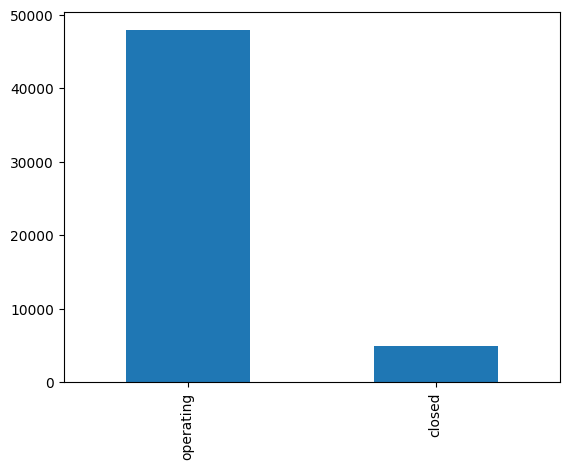

In [28]:
train_df.status.value_counts().plot(kind='bar')

In [29]:
def calc_lifetime(row):
    if row['status'] =='closed':
        return (row['closed_at'] - row['founded_at']).days
    else:
        return (pd.to_datetime('2018-01-01') - row['founded_at']).days

In [30]:
train_df['lifetime'] = train_df.apply(calc_lifetime, axis=1)
train_df = train_df[~(train_df.lifetime < 0)]


test_df['lifetime'] = test_df.apply(calc_lifetime, axis=1)
test_df = test_df[~(test_df.lifetime < 0)]


In [31]:
# create test/sample/ground truth kaggle datasets


ground_truth_df = test_df.copy()[['name', 'status']]
sample_submit_df = test_df.copy()[['name', 'status']]

ground_truth_df_public, ground_truth_df_private = train_test_split(ground_truth_df, test_size=0.5, 
                                                                   stratify=ground_truth_df['status'], 
                                                                   random_state=42)

ground_truth_df.loc[ground_truth_df_public.index,'Usage'] = 'Public'
ground_truth_df.loc[ground_truth_df_private.index,'Usage'] = 'Private'

ground_truth_df.to_csv('kaggle_startups_ground_truth_01.csv', index=False)
test_df.drop(columns=['status', 'lifetime']).to_csv('kaggle_startups_test_01.csv', index=False)
sample_submit_df['status'] = sample_submit_df['status'].apply(fill_status_random)
sample_submit_df.to_csv('kaggle_startups_sample_submit_01.csv', index=False)

In [32]:
test_df.shape, ground_truth_df.shape, sample_submit_df.shape

((13210, 14), (13210, 3), (13210, 2))

In [33]:
train_df.shape, test_df.shape

((52829, 14), (13210, 14))

In [34]:
train_df['lifetime_category'] = pd.cut(train_df.lifetime,bins=[0, 300, 1000, 100000 ], labels=['1-year', '3-year', '5-year'])
test_df['lifetime_category'] = pd.cut(test_df.lifetime,bins=[0, 300, 1000, 100000 ], labels=['1-year', '3-year', '5-year'])

In [35]:
train_X = train_df.drop(columns=['status', 'name', 'category_list'])
train_y = train_df.status

test_X = test_df.drop(columns=['status', 'name', 'category_list'])
test_y = test_df.status

In [36]:
num_cols = train_X.select_dtypes(include='number').columns.to_list()
cat_cols = train_X.select_dtypes(exclude=['number','datetime']).columns.to_list()


In [37]:
num_cols

['funding_total_usd', 'funding_rounds', 'lifetime']

In [38]:
cat_cols

['country_code', 'state_code', 'region', 'city', 'lifetime_category']

In [39]:
prepocessing = make_column_transformer((StandardScaler(), num_cols), 
                                       (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols), 
                                       remainder='drop')

In [43]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52829 entries, 33534 to 3622
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   funding_total_usd  42710 non-null  float64       
 1   country_code       47313 non-null  object        
 2   state_code         46046 non-null  object        
 3   region             46451 non-null  object        
 4   city               46451 non-null  object        
 5   funding_rounds     52829 non-null  int64         
 6   founded_at         52829 non-null  datetime64[ns]
 7   first_funding_at   52829 non-null  datetime64[ns]
 8   last_funding_at    52829 non-null  datetime64[ns]
 9   closed_at          4934 non-null   datetime64[ns]
 10  lifetime           52829 non-null  int64         
 11  lifetime_category  52829 non-null  category      
dtypes: category(1), datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 4.9+ MB


In [40]:
prepocessing

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['funding_total_usd', 'funding_rounds',
                                  'lifetime']),
                                ('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['country_code', 'state_code', 'region',
                                  'city', 'lifetime_category'])])

In [41]:
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(prepocessing, RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42, class_weight='balanced'))

In [55]:
train_X[num_cols] = train_X[num_cols].fillna(-1)
test_X[num_cols] = test_X[num_cols].fillna(-1)

train_X[cat_cols] = train_X[cat_cols].fillna('unknown')
test_X[cat_cols] = test_X[cat_cols].fillna('unknown')

In [63]:
pipeline.fit(train_X.drop('closed_at',axis=1), train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['funding_total_usd',
                                                   'funding_rounds',
                                                   'lifetime']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['country_code', 'state_code',
                                                   'region', 'city',
                                                   'lifetime_category'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        n_estimators=300, random_state=42))])

In [64]:
threshold = 0.4
predict_proba = pipeline.predict_proba(test_X.drop('closed_at',axis=1))
predicted = (predict_proba[:,0] >= threshold).astype('int')

In [73]:
predict = np.where(~test_X['closed_at'].isna()*1, 'closed', 'operating').tolist()

In [65]:
predict = np.where(predicted==1, 'closed', 'operating').tolist()

In [74]:
f1_score(test_y, predict, pos_label='closed')

1.0

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

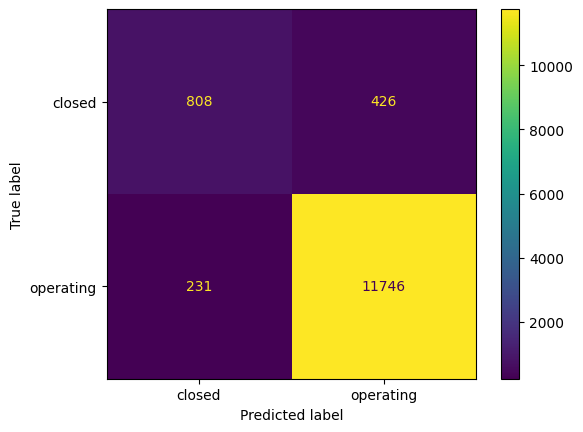

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_y, predict)

In [ ]:
imp = pipeline.steps[-1][1].feature_importances_
name = pipeline.steps[-2][1].get_feature_names_out()

<Axes: >

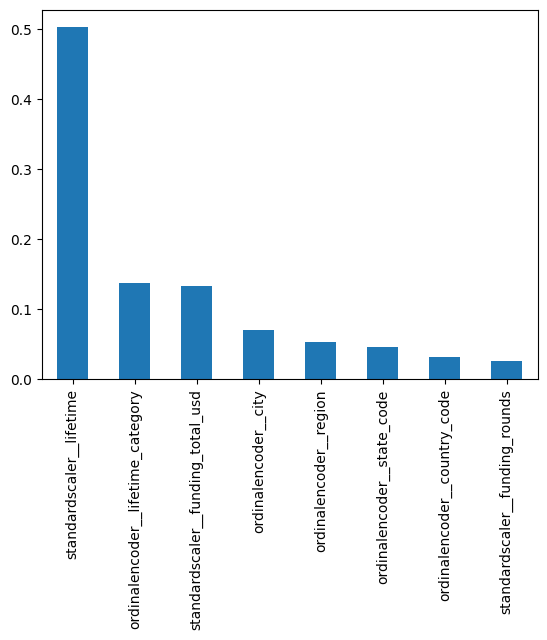

In [ ]:
pd.Series(index=name, data=imp).sort_values(ascending=False).plot(kind='bar')

In [ ]:
submit_predict = pd.DataFrame()
submit_predict['name'] = test_df['name']
submit_predict['status'] = predict
submit_predict.to_csv('kaggle_startups_sample_submit_predict_01.csv', index=False)

In [ ]:
submit_predict

,name,status
14075,Crystalsol,operating
29476,JBI Fish & Wings,operating
12344,COINPLUS,operating
26995,Imagine Communications,operating
16031,DNA13,operating
...,...,...
30014,Jymob,operating
23244,GlobaTrek,operating
27704,Inkd.com,operating
1687,AdWill,operating


In [ ]:
ground_truth_df.shape, test_df.shape, submit_predict.shape

((13211, 3), (13211, 15), (13211, 2))